In [1]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from keras.datasets import mnist
import scikitplot as skplt
import pandas as pd

In [6]:
# MNIST veri setini yükleme
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
# Veri setini normalleştirme
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:
# Veri setinin boyutlarını yeniden şekillendirme
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [9]:
# Derin öğrenme modeli için etiketleri one-hot encoding yapma
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
# Her kategoriden 1 örnek seçmek için bir dizi oluşturma
unique_classes = np.unique(y_train)
sample_indices = [np.where(y_train == uc)[0][0] for uc in unique_classes]
unique_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

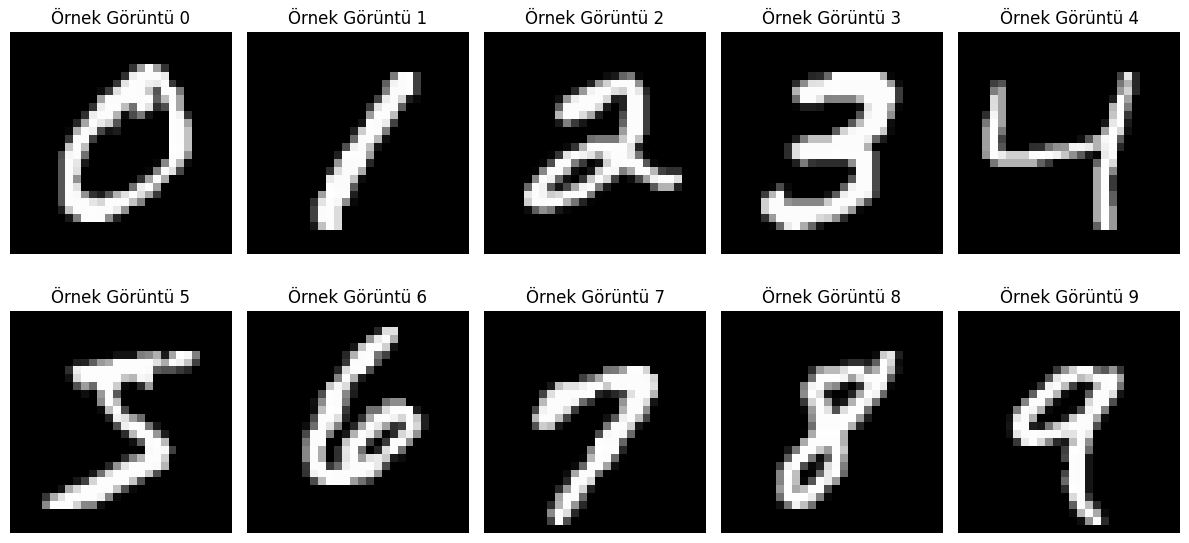

In [13]:
# Veri setinden bir örnek görüntüyü görselleştirme
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i, idx in enumerate(sample_indices):
    axes[i].imshow(X_train[idx][:, :, 0], cmap='gray')
    axes[i].set_title(f'Örnek Görüntü {y_train[idx]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Derin Öğrenme Modeli Oluşturma
deep_learning_model = Sequential()
deep_learning_model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
deep_learning_model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
deep_learning_model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
deep_learning_model.add(MaxPooling2D(pool_size=2))
deep_learning_model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
deep_learning_model.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
deep_learning_model.add(MaxPooling2D(pool_size=2))
deep_learning_model.add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
deep_learning_model.add(MaxPooling2D(pool_size=2, padding='same'))
deep_learning_model.add(Flatten())
deep_learning_model.add(Dense(256, activation='relu'))
deep_learning_model.add(Dense(10, activation='softmax'))

In [15]:
# Modeli özetleme
deep_learning_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 192)       221376    
                                                        

In [16]:
# Derin öğrenme modelini derleme
optimizer = 'adam'
deep_learning_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

In [17]:
# Early stopping ve learning rate reduction callback'leri ekleme
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-8, verbose=1)

In [18]:
# Derin öğrenme modelini eğitme
history = deep_learning_model.fit(X_train, y_train_cat, batch_size=100,
                                  epochs=100, validation_split=0.2,
                                  verbose=1, callbacks=[reduce_lr, early_stop], shuffle=True)

Epoch 1/100
480/480 [==============================] - 30s 55ms/step - loss: 0.1528 - acc: 0.9504 - val_loss: 0.0653 - val_acc: 0.9812 - lr: 0.0010
Epoch 2/100
480/480 [==============================] - 26s 55ms/step - loss: 0.0395 - acc: 0.9884 - val_loss: 0.0323 - val_acc: 0.9906 - lr: 0.0010
Epoch 3/100
480/480 [==============================] - 26s 55ms/step - loss: 0.0266 - acc: 0.9914 - val_loss: 0.0306 - val_acc: 0.9920 - lr: 0.0010
Epoch 4/100
480/480 [==============================] - 26s 55ms/step - loss: 0.0214 - acc: 0.9933 - val_loss: 0.0303 - val_acc: 0.9915 - lr: 0.0010
Epoch 5/100
480/480 [==============================] - 26s 55ms/step - loss: 0.0165 - acc: 0.9948 - val_loss: 0.0303 - val_acc: 0.9917 - lr: 0.0010
Epoch 6/100
480/480 [==============================] - 26s 55ms/step - loss: 0.0135 - acc: 0.9956 - val_loss: 0.0332 - val_acc: 0.9908 - lr: 0.0010
Epoch 7/100
480/480 [==============================] - 27s 55ms/step - loss: 0.0108 - acc: 0.9966 - val_loss: 0.

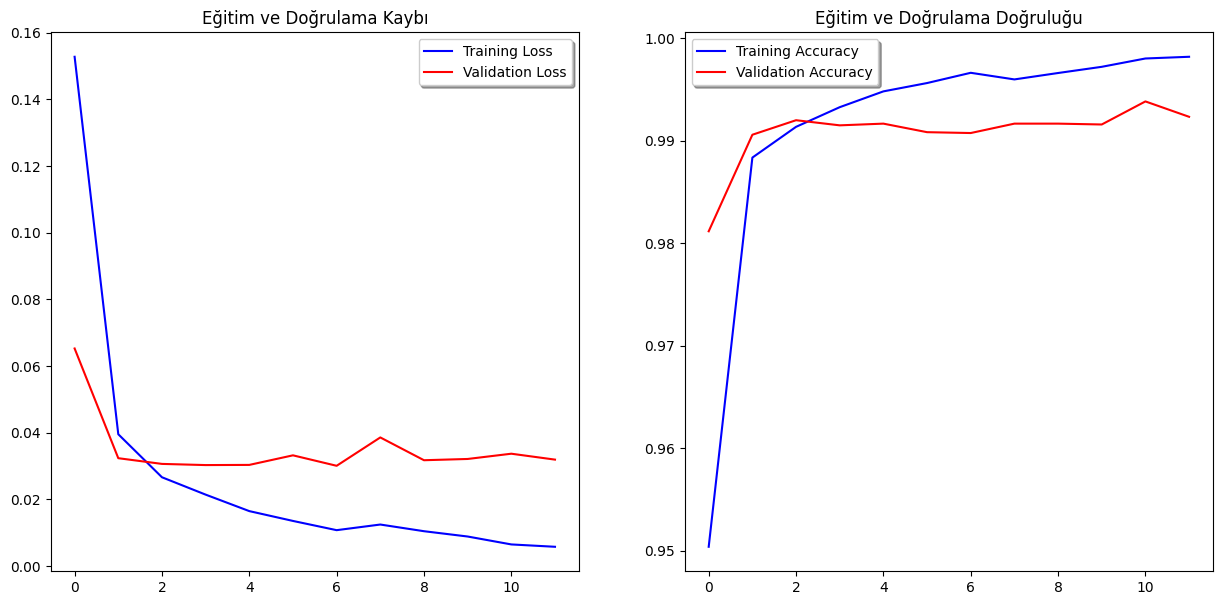

In [19]:
# Eğitim ve doğrulama kayıplarını ve doğruluklarını görselleştirme
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation Loss')
ax1.set_title('Eğitim ve Doğrulama Kaybı')
ax1.legend(loc='best', shadow=True)

ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['acc'], color='b', label='Training Accuracy')
ax2.plot(history.history['val_acc'], color='r', label='Validation Accuracy')
ax2.set_title('Eğitim ve Doğrulama Doğruluğu')
ax2.legend(loc='best', shadow=True)
plt.show()

313/313 [==============================] - 3s 8ms/step


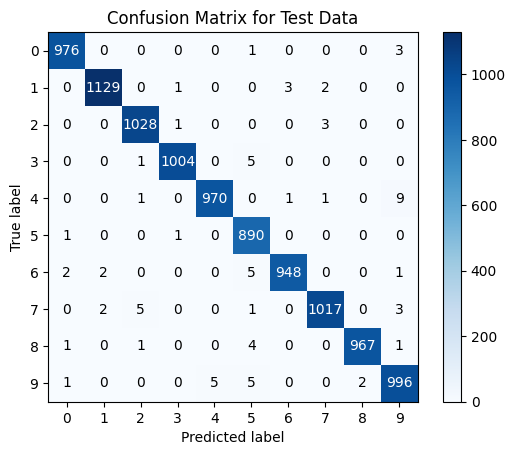

In [20]:
# Derin öğrenme modelinin doğruluğunu hesaplama
y_pred_dl = deep_learning_model.predict(X_test)
y_pred_classes_dl = np.argmax(y_pred_dl, axis=1)
y_true_dl = np.argmax(y_test_cat, axis=1)
skplt.metrics.plot_confusion_matrix(y_true_dl, y_pred_classes_dl, title='Confusion Matrix for Test Data')
plt.show()

In [21]:
# Derin öğrenme modelinin tahminlerini elde etme
deep_learning_features_train = deep_learning_model.predict(X_train)
deep_learning_features_test = deep_learning_model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


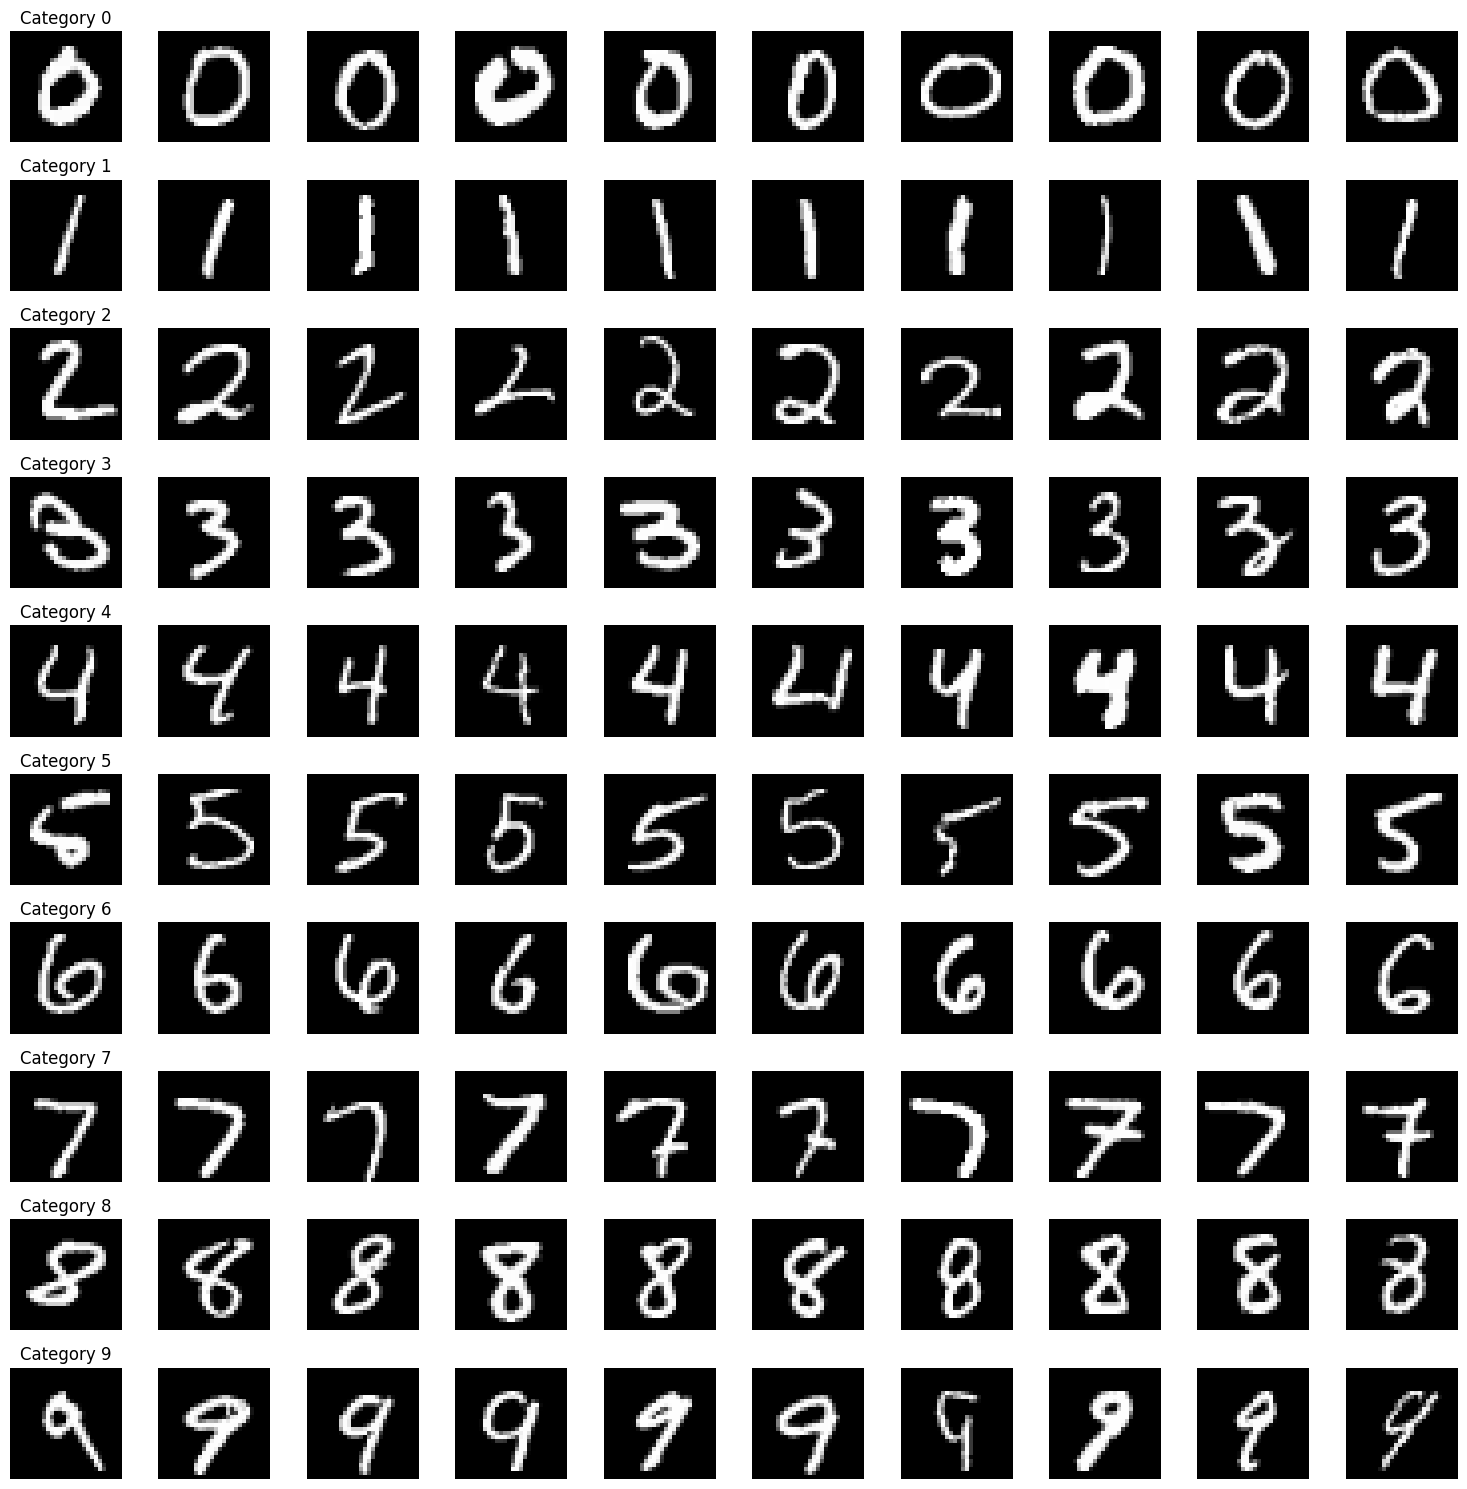

In [22]:
# Her kategoriden 10 tahmin edilen resmi seçme ve görselleştirme
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
axes = axes.ravel()

for i in range(10):
    category_indices = np.where(y_pred_classes_dl == i)[0][:10]
    for j, idx in enumerate(category_indices):
        axes[i*10 + j].imshow(X_test[idx].reshape(28, 28), cmap='gray')
        axes[i*10 + j].axis('off')
        if j == 0:
            axes[i*10 + j].set_title(f'Category {i}')

plt.tight_layout()
plt.show()

In [23]:
# Random Forest Modeli Oluşturma ve Eğitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [24]:
# Random Forest modelini derin öğrenme çıktılarıyla eğitme
rf_model.fit(deep_learning_features_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Random Forest modelinin tahminlerini yapma
y_pred_rf = rf_model.predict(deep_learning_features_test)

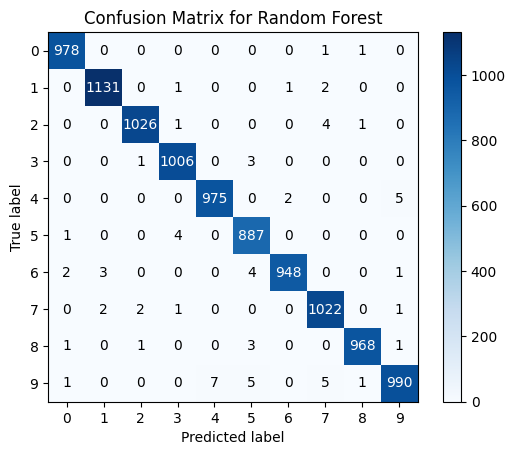

In [26]:
# Random Forest modeli sonuçlarını görselleştirme
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, title='Confusion Matrix for Random Forest')
plt.show()

In [27]:
# Modelleri karşılaştırma
models = ['Deep Learning Model', 'Random Forest Model']
accuracies = [accuracy_score(y_true_dl, y_pred_classes_dl), accuracy_score(y_test, y_pred_rf)]

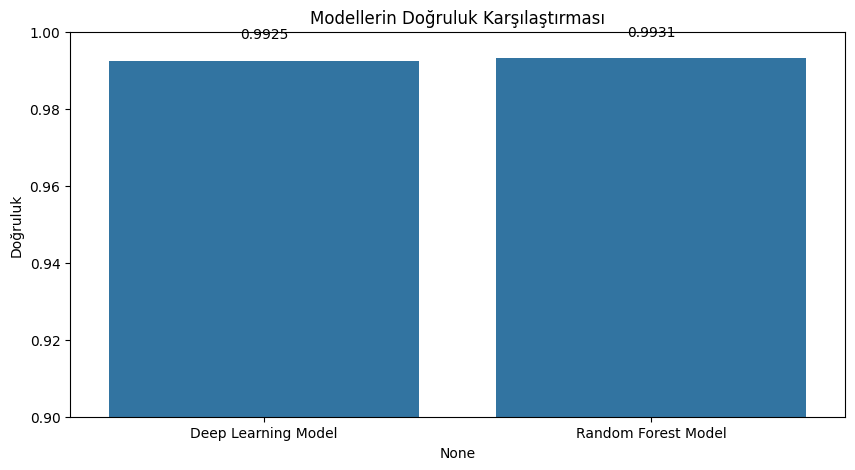

In [28]:
# Pandas series'e dönüştürme ve seaborn barplot kullanma
accuracies_series = pd.Series(accuracies, index=models)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=accuracies_series.index, y=accuracies_series.values)
plt.title('Modellerin Doğruluk Karşılaştırması')
plt.ylabel('Doğruluk')
plt.ylim(0.9, 1.0)
for i, v in enumerate(accuracies_series.values):
    ax.text(i, v + 0.005, f"{v:.4f}", ha='center', va='bottom')
plt.show()